In [1]:
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
class Autoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(True),
            nn.Linear(128, hidden_dim),
            nn.ReLU(True),
        )
        self.decoder = nn.Sequential(
            nn.Linear(hidden_dim, 128),
            nn.ReLU(True),
            nn.Linear(128, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    def encode(self, x):
        return self.encoder(x)

In [3]:
def load_data() -> tuple:
    # Transform to tensor and normalize
    transform = transforms.ToTensor()

    # Download and load the training and test sets
    trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

    trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
    testloader = DataLoader(testset, batch_size=64, shuffle=False)

    return trainloader, testloader

In [4]:
# DIMENSIONS
x, t = load_data()

img_0 = x.dataset[0][0]
x_linear_size = img_0.view(-1).shape[0]
latent_linear_size: int = 32

print(x_linear_size)
print(latent_linear_size)

784
32


In [10]:
# TRAINING

model = Autoencoder(x_linear_size, latent_linear_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

device = torch.device('cuda')
print(torch.cuda.is_available())
model.to(device)

# 4. Training loop
epochs = 5
for epoch in range(epochs):
    for images, _ in x:
        inputs = images.view(-1, 28*28).to(device)
        outputs = model(inputs)
        loss = criterion(outputs, inputs)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    #print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

True


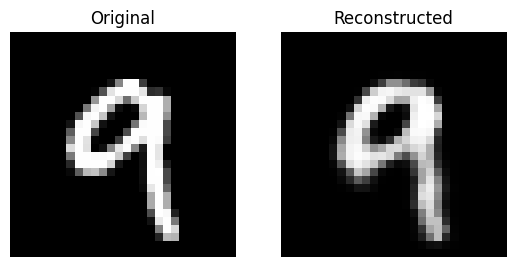

In [19]:
# INFERENCE

model.eval()
with torch.no_grad():
    img, _ = x.dataset[110]
    img_linear = img.view(-1).unsqueeze(0).to(device)

    output = model(img_linear)

    # Visualize original and reconstructed image
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(img.squeeze(), cmap='gray')
    axs[0].set_title('Original')

    axs[1].imshow(output[0].view(28, 28).cpu(), cmap='gray')
    axs[1].set_title('Reconstructed')
    for ax in axs: ax.axis('off')
    plt.show()